In [2]:
import pyzx as zx 
from graph_loader import load_graph
import networkx as nx
from f2linalg.f2linalg import Mat2
import numpy as np

In [18]:

# This is the choi state graph equivalent to one ZZ measurement on 2 qubits
lg = load_graph("zxgs/xx_stab_choi.zxg")

zx.draw(lg, labels=True)

In [4]:
lg2 = load_graph("zxgs/borghanstate.zxg")
# lg2.set_outputs([0,1,2,3])
# print(lg2.to_matrix())
zx.draw(lg2, labels=True)

[6, 3, 4, 5, 7]


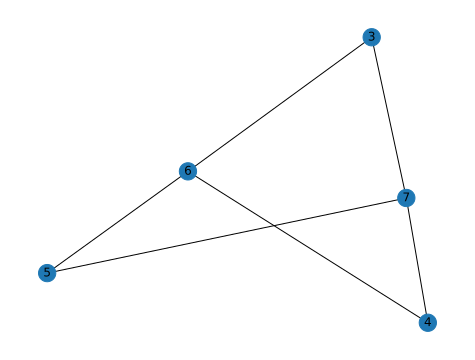

In [5]:
new_order = [3,4,5,6,7]
g2 = nx.Graph([(6,3),(6,4),(6,5),(7,3),(7,4),(7,5)])
g2_reordered = nx.to_numpy_array(g2, nodelist=new_order, dtype=np.uint8)
nx.draw(g2, with_labels=True)
print(g2.nodes)

[15, 14, 12, 13, 9, 10]


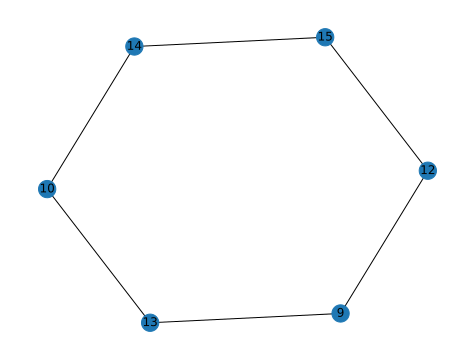

In [6]:
new_order = [9,10,12,13,14,15]
g3 = nx.Graph([(15,14),(15,12),\
              (13,9),(13,10),(12,9),(14,10)])
g_reordered3 = nx.to_numpy_array(g3, nodelist=new_order, dtype=np.uint8)
nx.draw(g3, with_labels=True)
print(g3.nodes)

[15, 14, 12, 13, 9, 10, 8, 11]


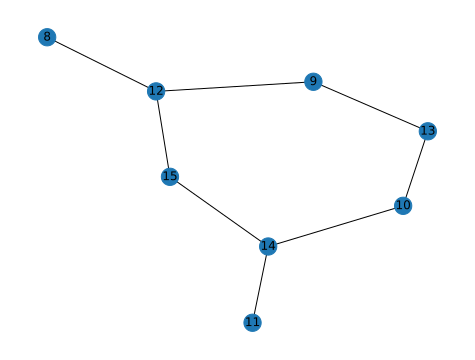

In [19]:
new_order = [8,9,10,11,12,13,14,15]
g = nx.Graph([(15,14),(15,12),\
              (13,9),(13,10),(12,8),(12,9),(14,10),(14,11)])
g_reordered = nx.to_numpy_array(g, nodelist=new_order, dtype=np.uint8)
nx.draw(g, with_labels=True)
print(g.nodes)

In [8]:
# The 3 here is number of output spiders
outs2 = 3
N2 = g2_reordered#nx.adjacency_matrix(g).todense()
I_n2 = np.eye(outs2, dtype=np.uint8)
zeroblock2 = np.zeros((N2.shape[1]-outs2, outs2), dtype=np.uint8)
mdl2 = np.vstack((I_n2, zeroblock2))
md2 = Mat2(np.hstack((mdl2, N2)))
print(md2)

[ 1  0  0  0  0  0  1  1 ]
[ 0  1  0  0  0  0  1  1 ]
[ 0  0  1  0  0  0  1  1 ]
[ 0  0  0  1  1  1  0  0 ]
[ 0  0  0  1  1  1  0  0 ]


In [9]:
# The 4 here is number of output spiders
outs = 4
N = g_reordered#nx.adjacency_matrix(g).todense()
I_n = np.eye(outs, dtype=np.uint8)
zeroblock = np.zeros((N.shape[1]-outs, outs), dtype=np.uint8)
mdl = np.vstack((I_n, zeroblock))
md = Mat2(np.hstack((mdl, N)))
print(md)

[ 1  0  0  0  0  0  0  0  1  0  0  0 ]
[ 0  1  0  0  0  0  0  0  1  1  0  0 ]
[ 0  0  1  0  0  0  0  0  0  1  1  0 ]
[ 0  0  0  1  0  0  0  0  0  0  1  0 ]
[ 0  0  0  0  1  1  0  0  0  0  0  1 ]
[ 0  0  0  0  0  1  1  0  0  0  0  0 ]
[ 0  0  0  0  0  0  1  1  0  0  0  1 ]
[ 0  0  0  0  0  0  0  0  1  0  1  0 ]


In [10]:
# The 4 here is number of output spiders
outs = 4
N3 = g_reordered3
I_n = np.eye(outs, dtype=np.uint8)
zeroblock3 = np.zeros((N3.shape[1]-outs, outs), dtype=np.uint8)
mdl3 = np.vstack((I_n, zeroblock3))
md3 = Mat2(np.hstack((mdl3, N3)))
print(md3)

[ 1  0  0  0  0  0  1  1  0  0 ]
[ 0  1  0  0  0  0  0  1  1  0 ]
[ 0  0  1  0  1  0  0  0  0  1 ]
[ 0  0  0  1  1  1  0  0  0  0 ]
[ 0  0  0  0  0  1  0  0  0  1 ]
[ 0  0  0  0  0  0  1  0  1  0 ]


In [11]:
print(np.hstack([np.array(vec.data)for vec in md3.nullspace()]))

[[0 1 1 0]
 [0 1 1 0]
 [1 0 0 1]
 [1 0 0 1]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [12]:
print(np.hstack([np.array(vec.data)for vec in md2.nullspace()]))

[[0 0 1 1]
 [0 0 1 1]
 [0 0 1 1]
 [1 1 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [13]:
mdns = np.hstack([np.array(vec.data)for vec in md.nullspace()])


In [14]:
from borghans import get_pws
from pyzx.pauliweb import PauliWeb
v = mdns[:,0]
d = new_order
pws = get_pws(d, v, lg)
print(pws)
# zx.draw(lg, labels=True)
# pw = PauliWeb(lg)
# pw.add_edge((11,7), 'X')
zx.draw(lg, labels=True, pauli_web=pws[1])

set()
(PauliWeb{8, 9, 10, 11, 12, 13, 14, 15}, PauliWebset())
